# Intro To ML

Haoyuan Chen; ID: 1664352

In this lab, we explore two basic models of machine learning: Boosted Decision Tree(BDT) and fully connected Neural Networks. We triained these two models to predict the decay length given the layer energies.

In general, a decision tree takes a set of input feature and splits input data recursively based on those feature. Its goal is to predict the value of target variables by learning decision rules inferred from data features. 

Fully connected neural networks is a multi-layer structured learning model, with each neuron in one layer is connected to every neurons in the next layer. The activation of a neuron will give weighted activation to the neurons in the next layer, and with such activation pass on, the model gives outputs.

## 1.Preparing the Data

First of all, we need to prepare the data for the model's training by loading the LLP files into pandas dataframe and filter out the desired data. In this case, we will use the data only from long lived particle. "

In [2]:
import numpy as np
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#open up all the llp files and load them into pandas dataframe
file1 = uproot.open("./llpfiles/df_1.root")
file2 = uproot.open("./llpfiles/df_2.root")
file3 = uproot.open("./llpfiles/df_3.root")
file4 = uproot.open("./llpfiles/df_4.root")
file5 = uproot.open("./llpfiles/df_5.root")
file6 = uproot.open("./llpfiles/df_6.root")

tree1 = file1["pandas_tree218"].pandas.df()
tree2 = file2["pandas_tree51358"].pandas.df()
tree3 = file3["pandas_tree53278"].pandas.df()
tree4 = file4["pandas_tree52558"].pandas.df()
tree5 = file5["pandas_tree53038"].pandas.df()
tree6 = file6["pandas_tree54718"].pandas.df()

In [44]:
#combine the data and filter out the desired data. Here, the desired data is loaded into "LLP_tree".
comb_tree = pd.concat([tree1,tree2,tree3,tree4,tree5,tree6], keys = ["tree1","tree2","tree3","tree4","tree5","tree6"], names = ["Tree"], sort = False)
LLP_tree = comb_tree.loc[comb_tree.IsLLP == True]
LLP_tree

RunNumber  EventNumber       JetPt    JetEta    JetPhi  IsLLP  \
Tree  entry                                                                    
tree1 0         284500.0    2041602.0   50.151355  1.767030  0.074290   True   
      2         284500.0    2159562.0  163.244844  1.709549  2.769850   True   
      6         284500.0    2041493.0   46.729578 -1.403121 -1.725780   True   
      8         284500.0    2159659.0   47.010680 -0.627007 -0.930283   True   
      9         284500.0    2159064.0   59.273605 -0.498937  2.036183   True   
...                  ...          ...         ...       ...       ...    ...   
tree6 1695787   310000.0    2628463.0  607.340875 -0.460089  1.738304   True   
      1695792   310000.0    2629127.0  167.727344 -1.445995  0.738336   True   
      1695797   310000.0    2629903.0  208.756359  0.050490  1.775342   True   
      1695820   310000.0    2629720.0   83.999984 -2.002803  2.893714   True   
      1695822   310000.0    2628963.0  216.514703  0.155385  2.572538   True   

               nLLPs_Near_Jets           Lx           Ly           Lz  ...  \
Tree  entry                                                            ...   
tree1 0                      1  1851.684326   178.223892  5354.035156  ...   
      2                      1   609.158691   239.010056  1741.357788  ...   
      6                      1   122.027023   903.753418  1733.289429  ...   
      8                      1  2115.701660  2620.996338  2361.141357  ...   
      9                      1   312.372742   689.039124   424.279541  ...   
...                        ...          ...          ...          ...  ...   
tree6 1695787                1   426.450104  2442.497803  1213.441162  ...   
      1695792                1  1441.990723  1419.345825  4256.796387  ...   
      1695797                1   487.297394  2181.379883   341.350647  ...   
      1695820                1  1011.810425   309.933258  3259.207275  ...   
      1695822                1  2221.168945  1310.453613   443.914246  ...   

                EH_TGL1   EH_TGL2   EH_EBL0   EH_EBL1   EH_EBL2  FC_L0  FC_L1  \
Tree  entry                                                                     
tree1 0        0.000000  0.000000  0.019344  0.000731  0.000000    0.0    0.0   
      2        0.000000  0.000000  0.004981 -0.000061  0.000000    0.0    0.0   
      6        0.000000  0.000401  0.039884  0.011312 -0.000262    0.0    0.0   
      8        0.001884  0.000000  0.000000  0.000000  0.000000    0.0    0.0   
      9        0.007204  0.000000  0.000000  0.000000  0.000269    0.0    0.0   
...                 ...       ...       ...       ...       ...    ...    ...   
tree6 1695787  0.000081  0.000000  0.000000  0.000000  0.000000    0.0    0.0   
      1695792  0.000269  0.002398  0.447402  0.085084  0.026268    0.0    0.0   
      1695797  0.000000  0.000000  0.000000  0.000000  0.000000    0.0    0.0   
      1695820  0.000000  0.000000  0.000000  0.000000  0.000000    0.0    0.0   
      1695822  0.000000  0.000000  0.000000  0.000000  0.000000    0.0    0.0   

               FC_L2            Lpt            Lpz  
Tree  entry                                         
tree1 0          0.0            NaN            NaN  
      2          0.0            NaN            NaN  
      6          0.0            NaN            NaN  
      8          0.0            NaN            NaN  
      9          0.0            NaN            NaN  
...              ...            ...            ...  
tree6 1695787    0.0  362247.626144 -177284.000000  
      1695792    0.0  154859.770543 -325802.156250  
      1695797    0.0  181654.953368   27742.279297  
      1695820    0.0  189880.445424 -584814.750000  
      1695822    0.0  145729.990106   25084.673828  

[707209 rows x 38 columns]

In [63]:
#Add a new panda series "Lxy", which describe the 2d decay length Lxy, into the filtered dataframe.
LLP_tree["Lxy"] = np.sqrt(LLP_tree.Lx ** 2 + LLP_tree.Ly ** 2)
LLP_tree

C:\Users\18917\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


RunNumber  EventNumber       JetPt    JetEta    JetPhi  IsLLP  \
Tree  entry                                                                    
tree1 0         284500.0    2041602.0   50.151355  1.767030  0.074290   True   
      2         284500.0    2159562.0  163.244844  1.709549  2.769850   True   
      6         284500.0    2041493.0   46.729578 -1.403121 -1.725780   True   
      8         284500.0    2159659.0   47.010680 -0.627007 -0.930283   True   
      9         284500.0    2159064.0   59.273605 -0.498937  2.036183   True   
...                  ...          ...         ...       ...       ...    ...   
tree6 1695787   310000.0    2628463.0  607.340875 -0.460089  1.738304   True   
      1695792   310000.0    2629127.0  167.727344 -1.445995  0.738336   True   
      1695797   310000.0    2629903.0  208.756359  0.050490  1.775342   True   
      1695820   310000.0    2629720.0   83.999984 -2.002803  2.893714   True   
      1695822   310000.0    2628963.0  216.514703  0.155385  2.572538   True   

               nLLPs_Near_Jets           Lx           Ly           Lz  ...  \
Tree  entry                                                            ...   
tree1 0                      1  1851.684326   178.223892  5354.035156  ...   
      2                      1   609.158691   239.010056  1741.357788  ...   
      6                      1   122.027023   903.753418  1733.289429  ...   
      8                      1  2115.701660  2620.996338  2361.141357  ...   
      9                      1   312.372742   689.039124   424.279541  ...   
...                        ...          ...          ...          ...  ...   
tree6 1695787                1   426.450104  2442.497803  1213.441162  ...   
      1695792                1  1441.990723  1419.345825  4256.796387  ...   
      1695797                1   487.297394  2181.379883   341.350647  ...   
      1695820                1  1011.810425   309.933258  3259.207275  ...   
      1695822                1  2221.168945  1310.453613   443.914246  ...   

                EH_TGL2   EH_EBL0   EH_EBL1   EH_EBL2  FC_L0  FC_L1  FC_L2  \
Tree  entry                                                                  
tree1 0        0.000000  0.019344  0.000731  0.000000    0.0    0.0    0.0   
      2        0.000000  0.004981 -0.000061  0.000000    0.0    0.0    0.0   
      6        0.000401  0.039884  0.011312 -0.000262    0.0    0.0    0.0   
      8        0.000000  0.000000  0.000000  0.000000    0.0    0.0    0.0   
      9        0.000000  0.000000  0.000000  0.000269    0.0    0.0    0.0   
...                 ...       ...       ...       ...    ...    ...    ...   
tree6 1695787  0.000000  0.000000  0.000000  0.000000    0.0    0.0    0.0   
      1695792  0.002398  0.447402  0.085084  0.026268    0.0    0.0    0.0   
      1695797  0.000000  0.000000  0.000000  0.000000    0.0    0.0    0.0   
      1695820  0.000000  0.000000  0.000000  0.000000    0.0    0.0    0.0   
      1695822  0.000000  0.000000  0.000000  0.000000    0.0    0.0    0.0   

                         Lpt            Lpz          Lxy  
Tree  entry                                               
tree1 0                  NaN            NaN  1860.241543  
      2                  NaN            NaN   654.370016  
      6                  NaN            NaN   911.954404  
      8                  NaN            NaN  3368.354987  
      9                  NaN            NaN   756.539254  
...                      ...            ...          ...  
tree6 1695787  362247.626144 -177284.000000  2479.446553  
      1695792  154859.770543 -325802.156250  2023.333837  
      1695797  181654.953368   27742.279297  2235.145844  
      1695820  189880.445424 -584814.750000  1058.214988  
      1695822  145729.990106   25084.673828  2578.930041  

[707209 rows x 39 columns]

## 2.Train and Test the Model for LLP Data
- Boosted Decision Tree

In [108]:
from sklearn import tree
model1 = tree.DecisionTreeRegressor()
energy = LLP_tree.loc[:,"EMM_BL0":"FC_L2"]
dlength = LLP_tree["Lxy"]
model1.fit(energy,dlength)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

- Neural Networks

In [107]:
from sklearn.neural_network import MLPRegressor
model2 = MLPRegressor(hidden_layer_sizes = 150, activation = "logistic", solver = "adam", max_iter = 200)
model2.fit(energy,dlength)

C:\Users\18917\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=150, learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

- Then we want to check how well these two models work to predict the decay length.

In [145]:
from sklearn import metrics
DTpredict = pd.DataFrame(model1.predict(energy))
NNpredict = model2.predict(energy)

In [195]:
print("The root mean square error of Decision Tree is ",np.sqrt(metrics.mean_squared_error(DTpredict,dlength)))
print("The root mean square error of Neural Networks is ",np.sqrt(metrics.mean_squared_error(NNpredict,dlength)))

The root mean square error of Decision Tree is  8.786561463662317e-07
The root mean square error of Neural Networks is  546.847141989618


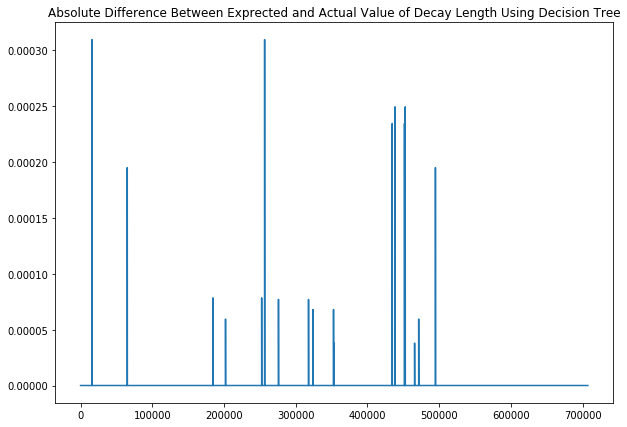

In [236]:
plt.figure(figsize = [10,7])
plot1 = plt.plot(np.absolute(dlength.values-DTpredict))
plt.title("Absolute Difference Between Exprected and Actual Value of Decay Length Using Decision Tree")
plt.show()

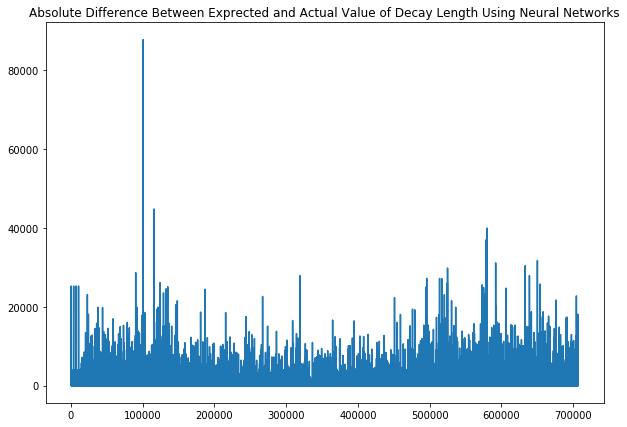

In [237]:
plt.figure(figsize = [10,7])
plot2 = plt.plot(np.absolute(dlength.values-NNpredict))
plt.title("Absolute Difference Between Exprected and Actual Value of Decay Length Using Neural Networks")
plt.show()

With the default setting, the Decision Tree model has made a good prediction for the test data set and it spend a small amount of time for the traing. However, the nearly perfect accuracy may indicate that the decision tree is overfitted to the test data. Its performance towards new data set remains doubted.

For the neural networks, the training process took a long time, and within the given number of iteration, it failed to reach convergence. The result is a very poor prediction accuracy. 

## Train and Test the Model for NLLP Data

In [238]:
NLLP_tree = comb_tree.loc[comb_tree.IsLLP == False]

In [239]:
Nenergy = NLLP_tree.loc[:,"EMM_BL0":"FC_L2"]
Ndlength = NLLP_tree["Lxy"]
model3 = tree.DecisionTreeRegressor()
model3.fit(Nenergy,Ndlength)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [240]:
model4 = MLPRegressor(hidden_layer_sizes = 150, activation = "logistic", solver = "adam", max_iter = 200)
model4.fit(Nenergy,Ndlength)

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=150, learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [245]:
DTpredictN = model3.predict(Nenergy)
NNpredictN = model4.predict(Nenergy)

In [247]:
print("The root mean square error of Decision Tree is ",np.sqrt(metrics.mean_squared_error(DTpredictN,Ndlength)))
print("The root mean square error of Neural Networks is ",np.sqrt(metrics.mean_squared_error(NNpredictN,Ndlength)))

The root mean square error of Decision Tree is  0.0
The root mean square error of Neural Networks is  1.6030017832702038e-05


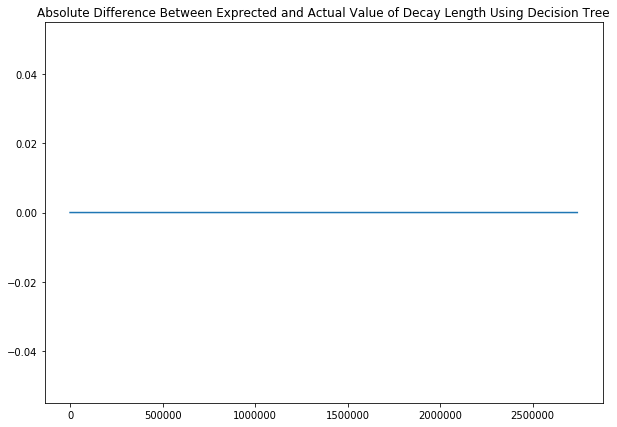

In [248]:
plt.figure(figsize = [10,7])
plot1 = plt.plot(np.absolute(Ndlength.values-DTpredictN))
plt.title("Absolute Difference Between Exprected and Actual Value of Decay Length Using Decision Tree")
plt.show()

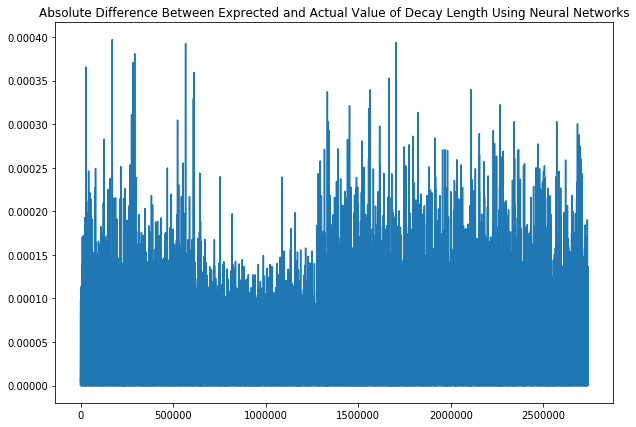

In [249]:
plt.figure(figsize = [10,7])
plot2 = plt.plot(np.absolute(Ndlength.values-NNpredictN))
plt.title("Absolute Difference Between Exprected and Actual Value of Decay Length Using Neural Networks")
plt.show()

This time, the accuracy of both methods improves. However, the boosted decision tree still works better than Neural Network.

## Include both LLP and NLLP Data

In [250]:
energyc = comb_tree.loc[:,"EMM_BL0":"FC_L2"]
dlengthc = comb_tree["Lxy"]

In [251]:
model1.fit(energyc,dlengthc)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [252]:
model2.fit(energyc,dlengthc)

C:\Users\18917\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=150, learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [253]:
DTpredictC = model1.predict(energyc)
NNpredictC = model2.predict(energyc)

In [254]:
print("The root mean square error of Decision Tree is ",np.sqrt(metrics.mean_squared_error(DTpredictC,dlengthc)))
print("The root mean square error of Neural Networks is ",np.sqrt(metrics.mean_squared_error(NNpredictC,dlengthc)))

The root mean square error of Decision Tree is  4.4639724158969176e-07
The root mean square error of Neural Networks is  447.4088654678627


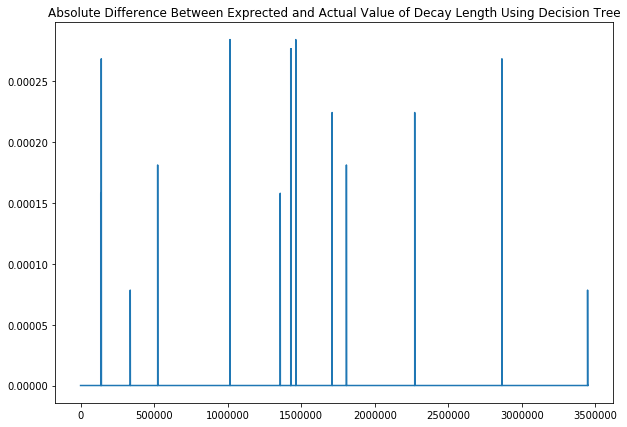

In [255]:
plt.figure(figsize = [10,7])
plot1 = plt.plot(np.absolute(dlengthc.values-DTpredictC))
plt.title("Absolute Difference Between Exprected and Actual Value of Decay Length Using Decision Tree")
plt.show()

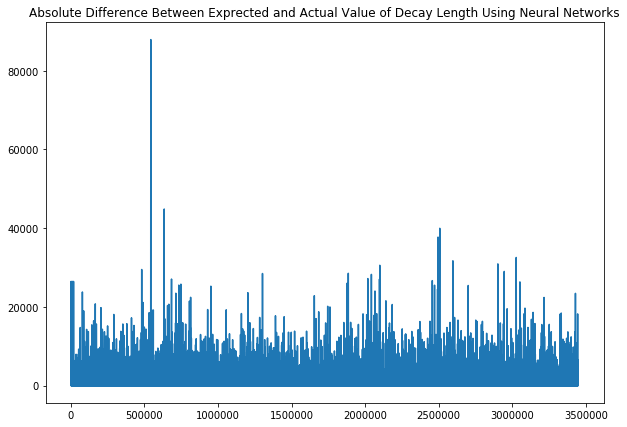

In [256]:
plt.figure(figsize = [10,7])
plot2 = plt.plot(np.absolute(dlengthc.values-NNpredictC))
plt.title("Absolute Difference Between Exprected and Actual Value of Decay Length Using Neural Networks")
plt.show()

- From the test, the neural network gives bad prediction. The major problem here is that neural network needs a lot more time to train itself, and within the given number of iteration, it cannot reach an optimized output. 

## Cross Validation

- Use cross validation to check the accuracy of decision tree on LLP data only

In [259]:
from sklearn.model_selection import train_test_split

In [261]:
energy_train, energy_test, dlength_train, dlength_test = train_test_split(energy,dlength,test_size = 0.3)
model1.fit(energy_train,dlength_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [262]:
dlength_pred = model1.predict(energy_test)

In [264]:
print("The root mean square error of Decision Tree is ",np.sqrt(metrics.mean_squared_error(dlength_pred,dlength_test)))

The root mean square error of Decision Tree is  758.4379033182549


- There is a large error of the the decision tree on the splited data. With the default setting of decision tree parameters, the model overfits to the given data and is not expected to give acceptable predition for new data.